In [86]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from IPython import display
display.set_matplotlib_formats('svg')

生成数据

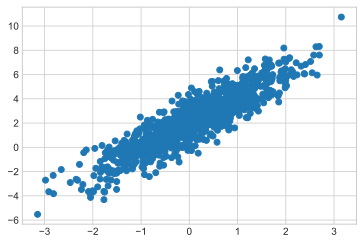

In [87]:
def gen(w,b,num):
    x = np.random.normal(0,1,(num,w.shape[0]))
    y = np.dot(x,w)+b
    y += np.random.normal(0,0.01,y.shape)
    return x,y

true_w,true_b = np.array([1,2]), 2
x,y = gen(true_w,true_b,1000)
x = np.append(x,np.ones(x.shape[0]).reshape(-1,1),axis=1)

# print(x)
# print(y)
plt.scatter(x[:,(1)],y[:])

dataloader

In [88]:
def data_loader(x,y,batch_size):
    nums = len(x)
    indices = list(range(nums))
    random.shuffle(indices)
    for i in range(0,nums,batch_size):
        batch_indices = indices[i:min(i+batch_size,nums)]
        yield x[batch_indices],y[batch_indices]
    

In [89]:
# batch_size = 10
# for x_batch,y_batch in data_loader(x,y,batch_size):
#     print(x_batch.shape)

初始化参数

In [90]:
w = np.random.normal(0,0.01,size=(2,1))
b = np.zeros(1)
param = np.append(w,b).reshape(-1,1)

定义模型

In [91]:
def model(x,theta):
    return np.dot(x,theta)

定义损失函数

In [92]:
def loss(y,y_pred):
    return np.mean((y.reshape(y_pred.shape)-y_pred)**2)/2

定义优化器

In [93]:
def gradient(theta, xi, yi):
    return xi.T.dot(xi.dot(theta)-yi.reshape(-1,1))

In [100]:
def l2_clip(v,b):
    norm =np.linalg(v,ord=2)
    if norm > b:
        return b*(v/norm)

    else:
        return v

In [ ]:
def gaussian_mech_vec(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon, size=len(v))

In [94]:
def sgd(xx,yy,param,learning_rate):
    y_pred = model(xx,param)
    loss_ = loss(yy,y_pred)
    grad_sum = []
    for sample_x,sample_y in zip(xx,yy):
        grad = gradient(param,sample_x,sample_y)
    gradient_ = gradient(param,xx,yy)
    param -= learning_rate * gradient_
    param = gaussian_mech_vec(param, 0.01, 0.01, 0.01)

训练

In [95]:
def train(x,y,theta,learning_rate,epochs,batch_size):
    losses=[]
    for i in range(epochs):
        for input, label in data_loader(x,y,batch_size):
            sgd(input,label,theta,learning_rate)
        print('epoch:%d, loss:%f'%(i,loss(y,model(x,theta))))
        losses.append(loss(y,model(x,theta)))
    return losses

超参数设置

In [96]:
learning_rate = 0.001
epochs = 10
batch_size = 10

训练模型

In [97]:
history = train(x,y,param,learning_rate,epochs,batch_size)

epoch:0, loss:0.542978
epoch:1, loss:0.059954
epoch:2, loss:0.006686
epoch:3, loss:0.000786
epoch:4, loss:0.000130
epoch:5, loss:0.000057
epoch:6, loss:0.000049
epoch:7, loss:0.000048
epoch:8, loss:0.000048
epoch:9, loss:0.000048


In [98]:
param

array([[1.00004949],
       [2.00020104],
       [2.0000814 ]])

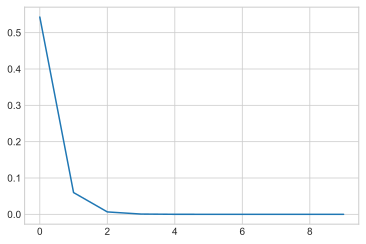

In [99]:
plt.plot(history)